### Computer Vision Deep Learning

The codes behind CV is a lot like multiclass classification. We encode the picture into tensors for the computer to understand, and it churns out the **probabailities** of what the photo is (but we need to do labelling of data on the photos first)

CNN layer is a good algorithm to learn from images, as the window convolves through each pixel-turned-tensor-data, and try to learn patterns from the images.

In [2]:
#deep learning
import torch
from torch import nn

#computer viz
import torchvision 
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary
from sklearn.datasets import make_blobs


In [4]:
train_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=True,  #do we want the training dataset?
    download=True, #download it?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)


test_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=False,  #do we want the training dataset?
    download=True, #download it?
    transform=ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

In [5]:
len(train_data)

60000

In [6]:
#see the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [25]:
#it's a 9! which relates to an ankle boot
image_with_labels = train_data.class_to_idx
image_with_labels

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

torch.Size([1, 28, 28])


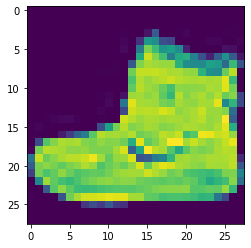

In [14]:
#28 pixels across, 28 pixels down. not very high definition
print(train_data[0][0].shape)
image, label = train_data[0]
plt.imshow(image.squeeze())

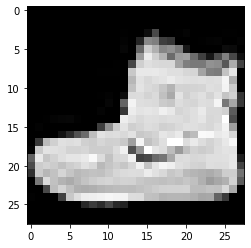

In [16]:
#grayscale
plt.imshow(image.squeeze(), cmap='gray')

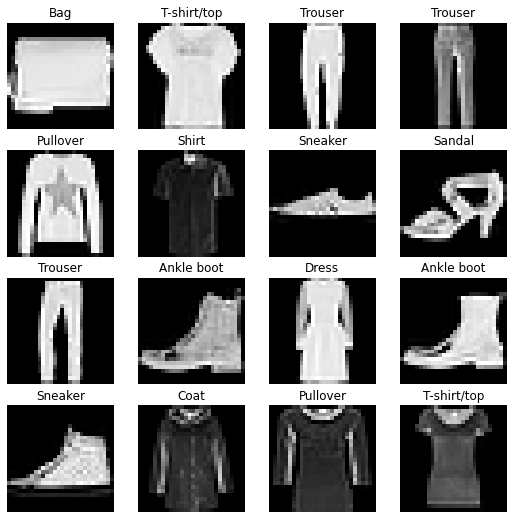

In [26]:
#visualizing more images. 
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx] #img returns a tensor value, which is a representation of an image but with numbers
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

In [29]:
#batch sizes for faster processing
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, 
                              shuffle=True)